In [1]:
import os
import numpy as np
import pandas as pd
from tifffile import imread
from skimage.util import img_as_float
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# save dir
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/flatfield_artifact')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# image dir
img_path = '/Volumes/My Book/cylinter_input/CODEX/tif/sample_2.ome.tif'
img = imread(img_path)

# segmentation dir
seg_path = '/Volumes/My Book/cylinter_input/CODEX/seg/sample_2.ome.tif'
seg = imread(seg_path)

In [3]:
data_path = (
    '/Volumes/My Book/cylinter_input/CODEX/csv/unmicst-sample_2_cell.csv'
    )
data = pd.read_csv(data_path)

# update X coordinates to account for splitting the original image
data['X_centroid'] = data['X_centroid']-18500  # from crop.txt

In [4]:
# define an image crop window
row_min = 2000
row_max = 10000
col_min = 1000
col_max = 9000

# crop image and segmentation outlines to centroid limits
img = img[:, row_min:row_max, col_min:col_max]
seg = seg[:, row_min:row_max, col_min:col_max]

# select single cells within cropped image
data_crop = data[
    (data['X_centroid'].between(col_min, col_max)) &
    (data['Y_centroid'].between(row_min, row_max))].copy()

# update x, y coordinates of cells within cropped window
data['X_centroid'] = data['X_centroid']-col_min
data['Y_centroid'] = data['Y_centroid']-row_min

In [5]:
# plot image
# read DNA1
dna = img[0]
dna = img_as_float(dna)
dna = (dna - np.min(dna)) / (np.max(dna) - np.min(dna))  # normalize 0-1
bottom_cutoff = 0.05
top_cutoff = 0.7
dna = np.clip(dna, bottom_cutoff, top_cutoff)
dna = (dna - np.min(dna)) / (np.max(dna) - np.min(dna))  # normalize 0-1
dna = gray2rgb(dna)
dna = dna * (0.7, 0.7, 0.7)  # color gray
plt.imshow(dna)
plt.savefig(os.path.join(save_dir, 'dna.png'), dpi=1000)
plt.close('all')

# read MHC-1 channel
mhc1 = img[19]
mhc1 = img_as_float(mhc1)
mhc1 = (mhc1 - np.min(mhc1)) / (np.max(mhc1) - np.min(mhc1))  # normalize 0-1
bottom_cutoff = 0.01
top_cutoff = 0.15
mhc1 = np.clip(mhc1, bottom_cutoff, top_cutoff)
mhc1 = (mhc1 - np.min(mhc1)) / (np.max(mhc1) - np.min(mhc1))  # normalize 0-1
mhc1 = gray2rgb(mhc1)
mhc1 = mhc1 * (0.7, 0.7, 0.7)  # color light blue (0.05, 0.60, 0.73)
plt.imshow(mhc1)
plt.savefig(os.path.join(save_dir, 'mhc1.png'), dpi=1000)
plt.close('all')

# plot segmentation outlines
seg = seg[0]
seg = img_as_float(seg)
seg = gray2rgb(seg)
seg = seg * (0.13, 1.0, 0.02)
plt.imshow(seg)
plt.savefig(os.path.join(save_dir, 'seg.png'), dpi=1000)

# add segmentation outlines to DNA1
dna_seg = dna + seg

# plot merged image
plt.imshow(dna_seg)
plt.savefig(os.path.join(save_dir, 'DNA_seg.png'), dpi=1000)
plt.close('all')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
80
161
242
323
404
484
565
646
727
808
888
969
1050
1131
1212
1292
1373
1454
1535
1616
1696
1777
1858
1939
2020
2101
2181
2262
2343
2424
2505
2585
2666
2747
2828
2909
2989
3070
3151
3232
3313
3393
3474
3555
3636
3717
3797
3878
3959
4040
4121
4202
4282
4363
4444
4525
4606
4686
4767
4848
4929
5010
5090
5171
5252
5333
5414
5494
5575
5656
5737
5818
5898
5979
6060
6141
6222
6303
6383
6464
6545
6626
6707
6787
6868
6949
7030
7111
7191
7272
7353
7434
7515
7595
7676
7757
7838
7919
0
80
161
242
323
404
484
565
646
727
808
888
969
1050
1131
1212
1292
1373
1454
1535
1616
1696
1777
1858
1939
2020
2101
2181
2262
2343
2424
2505
2585
2666
2747
2828
2909
2989
3070
3151
3232
3313
3393
3474
3555
3636
3717
3797
3878
3959
4040
4121
4202
4282
4363
4444
4525
4606
4686
4767
4848
4929
5010
5090
5171
5252
5333
5414
5494
5575
5656
5737
5818
5898
5979
6060
6141
6222
6303
6383


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6464
6545
6626
6707
6787
6868
6949
7030
7111
7191
7272
7353
7434
7515
7595
7676
7757
7838
7919


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


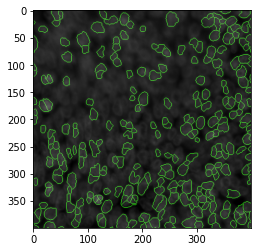

In [6]:
# subdivide image X axis into intervals of arbitrary length
x_range = np.linspace(0, img.shape[2], 100).astype(int)

# subdivide image Y axis in to intervals of arbitrary length
y_range = np.linspace(0, img.shape[1], 100).astype(int)

# get cell segmentation counts within each interval
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].imshow(dna_seg)

for e, (axis, finish, center) in enumerate(zip(
  ['X_centroid', 'Y_centroid'],
  [x_range, y_range],
  [(col_max-col_min)/2, (row_max-row_min)/2])
  ):

    # define x, y start pixels
    start = 0

    # initialize a list to append cell segmentation counts
    counts = []
    points = []

    for e, i in enumerate(finish):

        if e != 0:

            print(start)

            points.append(start+(i-start)/2)

            seg_within_rnge = len(data[data[axis].between(start, i)])

            counts.append(seg_within_rnge)

            if axis == 'X_centroid':
                point1 = [start, center]
                point2 = [i, center]
                x_values = [point1[0], point2[0]]
                y_values = [point1[1], point2[1]]
                # ax[0, 0].plot(x_values, y_values)
            elif axis == 'Y_centroid':
                point1 = [center, start]
                point2 = [center, i]
                x_values = [point1[0], point2[0]]
                y_values = [point1[1], point2[1]]
                # ax[0, 0].plot(x_values, y_values)

            start = i

        if axis == 'X_centroid':
            ax[1, 0].plot(points, counts, c='k', lw=0.1)
            asp = np.diff(
                ax[1, 0].get_xlim())[0] / np.diff(ax[1, 0].get_ylim())[0]
            ax[1, 0].set_aspect(asp)
        if axis == 'Y_centroid':
            ax[0, 1].plot(counts, points, c='k', lw=0.1)
            asp = np.diff(
                ax[0, 1].get_xlim())[0] / np.diff(ax[0, 1].get_ylim())[0]
            ax[0, 1].set_aspect(asp)

# define an inset crop window
row_min = 3600
row_max = 4000
col_min = 2700
col_max = 3100

# crop image and segmentation outlines to centroid limits
dna_inset = dna_seg[row_min:row_max, col_min:col_max]
ax[1, 1].imshow(dna_inset)

rect = patches.Rectangle(
    (col_min, row_min), (row_max-row_min), (col_max-col_min),
    linewidth=0.2, edgecolor='w', facecolor='none')
ax[0, 0].add_patch(rect)

# ax[0, 0].spines['top'].set_visible(False)
# ax[0, 0].spines['right'].set_visible(False)
# ax[0, 0].spines['bottom'].set_visible(False)
# ax[0, 0].spines['left'].set_visible(False)
# ax[0, 0].get_xaxis().set_ticks([])
# ax[0, 0].get_yaxis().set_ticks([])

# ax[1, 1].spines['top'].set_visible(False)
# ax[1, 1].spines['right'].set_visible(False)
# ax[1, 1].spines['bottom'].set_visible(False)
# ax[1, 1].spines['left'].set_visible(False)
# ax[1, 1].get_xaxis().set_ticks([])
# ax[1, 1].get_yaxis().set_ticks([])

# ax[1, 1].axis('off')
ax[0, 1].invert_yaxis()

# plt.show()
# plt.savefig(os.path.join(save_dir, 'grid.png'), dpi=1000)
plt.savefig(os.path.join(save_dir, 'grid.pdf'))
plt.close('all')

plt.imshow(dna_inset)
plt.savefig(os.path.join(save_dir, 'inset.png'), dpi=1000)